# Week5 - Logistic Regression Assignment

- Run the below cells.
- Complete all of the numbered questions. You may call any packages that we've used in class.  

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/employee-turnover-balanced.csv')
df.head()

left_company  age frequency_of_travel              department  \
0           No   37       Travel_Rarely                   Sales   
1           No   39       Travel_Rarely  Research & Development   
2           No   52   Travel_Frequently  Research & Development   
3           No   50          Non-Travel                   Sales   
4           No   44       Travel_Rarely  Research & Development   

   commuting_distance  education  satisfaction_with_environment  gender  \
0                  16          4                              4    Male   
1                   3          2                              3    Male   
2                  25          4                              3  Female   
3                   1          3                              4  Female   
4                   4          3                              4    Male   

   seniority_level                   position  satisfaction_with_job  \
0                2            Sales Executive                      3   
1                2      Laboratory Technician                      3   
2                4     Manufacturing Director                      4   
3                2            Sales Executive                      3   
4                2  Healthcare Representative                      2   

  married_or_single  last_raise_pct  last_performance_rating  \
0          Divorced              19                        3   
1          Divorced              15                        3   
2           Married              22                        4   
3           Married              12                        3   
4            Single              12                        3   

   total_years_working  years_at_company  years_in_current_job  \
0                    9                 1                     0   
1                   11                10                     8   
2                   31                 9                     8   
3                   19                18                     7   
4                   10                 5                     2   

   years_since_last_promotion  years_with_current_supervisor  
0                           0                              0  
1                           0                              7  
2                           0                              0  
3                           0                             13  
4                           2                              3

## Data Definitions
- `left_company`: Whether individual left the company or not. This is the target variable.  
- `age`: Age of individual.
- `frequency_of_travel`: How often person travels for work.  
- `department`: Department person works(worked).  
- `commuting_distance`: Distance person lives from office.  
- `education`: Highest education category.  
- `satisfaction_with_environment`: Satisfaction of environment, on lickert scale.  
- `gender`: Gender of individual.  
- `seniority_level`: Seniority level of individual.  
- `position`: Last position held at the company.  
- `satisfaction_with_job`: Satisfaction of their job, on lickert scale.  
- `married_or_single`: Marital status of person.  
- `last_raise_pct`: Percent increase their last raise represented.  
- `last_performance_rating`: Most recent annual performance rating, on lickert scale.  
- `total_years_working`: Number of years the individual has spent working in their career.  
- `years_at_company`: Number of years the individual has been at the company, regardless of position.  
- `years_in_current_job`: Number of years the individual has been in their current position.  
- `years_since_last_promotion`: Years since the person had their last promotion.  
- `years_with_current_supervisor`: Years the person has had their current supervisor.

# Question 1
- What is the distribution of the target (`left_company`)?  
- Do you have any concerns on class imbalances?

<ipython-input-6-52b4874c47df>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


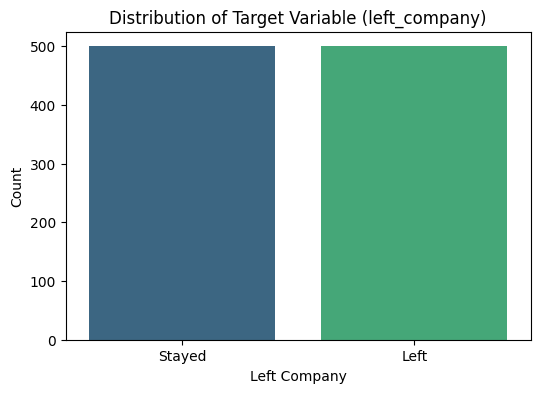

No significant class imbalance detected.
Class Distribution:
 left_company
No     500
Yes    500
Name: count, dtype: int64


In [6]:
class_counts = df['left_company'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.xlabel('Left Company')
plt.ylabel('Count')
plt.title('Distribution of Target Variable (left_company)')
plt.xticks(ticks=[0,1], labels=['Stayed', 'Left'])
plt.show()


imbalance_ratio = class_counts.min() / class_counts.max()
if imbalance_ratio < 0.5:
    print("Warning: Potential class imbalance detected!")
else:
    print("No significant class imbalance detected.")

print("Class Distribution:\n", class_counts)

Insert comments here

No imbalance in class distribution

# Question 2
- Do a quick EDA
- Can you create new features that captures the relation with the target better?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   left_company                   1000 non-null   object
 1   age                            1000 non-null   int64 
 2   frequency_of_travel            1000 non-null   object
 3   department                     1000 non-null   object
 4   commuting_distance             1000 non-null   int64 
 5   education                      1000 non-null   int64 
 6   satisfaction_with_environment  1000 non-null   int64 
 7   gender                         1000 non-null   object
 8   seniority_level                1000 non-null   int64 
 9   position                       1000 non-null   object
 10  satisfaction_with_job          1000 non-null   int64 
 11  married_or_single              1000 non-null   object
 12  last_raise_pct                 1000 non-null   int64 
 13  last

In [8]:
df.describe()

age  commuting_distance    education  \
count  1000.000000         1000.000000  1000.000000   
mean     35.713000            9.593000     2.864000   
std       9.366556            8.118452     1.029837   
min      18.000000            1.000000     1.000000   
25%      29.000000            2.000000     2.000000   
50%      34.000000            8.000000     3.000000   
75%      42.000000           15.000000     4.000000   
max      60.000000           29.000000     5.000000   

       satisfaction_with_environment  seniority_level  satisfaction_with_job  \
count                    1000.000000      1000.000000            1000.000000   
mean                        2.597000         1.909000               2.621000   
std                         1.122431         1.067642               1.120095   
min                         1.000000         1.000000               1.000000   
25%                         2.000000         1.000000               2.000000   
50%                         3.000000         2.000000               3.000000   
75%                         4.000000         2.000000               4.000000   
max                         4.000000         5.000000               4.000000   

       last_raise_pct  last_performance_rating  total_years_working  \
count     1000.000000              1000.000000           1000.00000   
mean        15.244000                 3.166000             10.20600   
std          3.752939                 0.372267              7.73637   
min         11.000000                 3.000000              0.00000   
25%         12.000000                 3.000000              5.00000   
50%         14.000000                 3.000000              9.00000   
75%         18.000000                 3.000000             13.00000   
max         25.000000                 4.000000             40.00000   

       years_at_company  years_in_current_job  years_since_last_promotion  \
count       1000.000000           1000.000000                 1000.000000   
mean           6.420000              3.857000                    2.065000   
std            6.165518              3.513815                    3.094568   
min            0.000000              0.000000                    0.000000   
25%            2.000000              2.000000                    0.000000   
50%            5.000000              2.000000                    1.000000   
75%            9.000000              7.000000                    2.000000   
max           40.000000             18.000000                   15.000000   

       years_with_current_supervisor  
count                    1000.000000  
mean                        3.754000  
std                         3.500534  
min                         0.000000  
25%                         1.000000  
50%                         2.000000  
75%                         7.000000  
max                        17.000000

In [9]:
df.isnull().sum()

left_company                     0
age                              0
frequency_of_travel              0
department                       0
commuting_distance               0
education                        0
satisfaction_with_environment    0
gender                           0
seniority_level                  0
position                         0
satisfaction_with_job            0
married_or_single                0
last_raise_pct                   0
last_performance_rating          0
total_years_working              0
years_at_company                 0
years_in_current_job             0
years_since_last_promotion       0
years_with_current_supervisor    0
dtype: int64

In [23]:
df['years_since_promotion_ratio'] = df['years_since_last_promotion'] / (df['years_at_company'] + 1)
df['raise_to_performance_ratio'] = df['last_raise_pct'] / (df['last_performance_rating'] + 1)
df['job_satisfaction_to_env_ratio'] = df['satisfaction_with_job'] / (df['satisfaction_with_environment'] + 1)
df['commute_working_ratio'] = df['commuting_distance'] / (df['total_years_working'] + 1)

print("New Features Created:")
print(df[['years_since_promotion_ratio', 'raise_to_performance_ratio', 'job_satisfaction_to_env_ratio', 'commute_working_ratio']].head())


New Features Created:
   years_since_promotion_ratio  raise_to_performance_ratio  \
0                     0.000000                        4.75   
1                     0.000000                        3.75   
2                     0.000000                        4.40   
3                     0.000000                        3.00   
4                     0.333333                        3.00   

   job_satisfaction_to_env_ratio  commute_working_ratio  
0                           0.60               1.600000  
1                           0.75               0.250000  
2                           1.00               0.781250  
3                           0.60               0.050000  
4                           0.40               0.363636  


Summarize your findings here

There are no null values and new features are added

years_since_promotion_ratio: Measures the impact of promotions on tenure.

raise_to_performance_ratio: Evaluates how raises compare to performance ratings.

job_satisfaction_to_env_ratio: Compares job satisfaction to environment satisfaction.

commute_working_ratio: Assesses the impact of commuting distance on career duration.

In [11]:
df.head()

left_company  age frequency_of_travel              department  \
0           No   37       Travel_Rarely                   Sales   
1           No   39       Travel_Rarely  Research & Development   
2           No   52   Travel_Frequently  Research & Development   
3           No   50          Non-Travel                   Sales   
4           No   44       Travel_Rarely  Research & Development   

   commuting_distance  education  satisfaction_with_environment  gender  \
0                  16          4                              4    Male   
1                   3          2                              3    Male   
2                  25          4                              3  Female   
3                   1          3                              4  Female   
4                   4          3                              4    Male   

   seniority_level                   position  ...  last_performance_rating  \
0                2            Sales Executive  ...                        3   
1                2      Laboratory Technician  ...                        3   
2                4     Manufacturing Director  ...                        4   
3                2            Sales Executive  ...                        3   
4                2  Healthcare Representative  ...                        3   

  total_years_working  years_at_company  years_in_current_job  \
0                   9                 1                     0   
1                  11                10                     8   
2                  31                 9                     8   
3                  19                18                     7   
4                  10                 5                     2   

   years_since_last_promotion  years_with_current_supervisor  \
0                           0                              0   
1                           0                              7   
2                           0                              0   
3                           0                             13   
4                           2                              3   

   years_since_promotion_ratio  raise_to_performance_ratio  \
0                     0.000000                        4.75   
1                     0.000000                        3.75   
2                     0.000000                        4.40   
3                     0.000000                        3.00   
4                     0.333333                        3.00   

   job_satisfaction_to_env_ratio  commute_working_ratio  
0                           0.60               1.600000  
1                           0.75               0.250000  
2                           1.00               0.781250  
3                           0.60               0.050000  
4                           0.40               0.363636  

[5 rows x 23 columns]

# Question 3
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [24]:
numerical_vars = ['age', 'commuting_distance', 'last_raise_pct', 'last_performance_rating', 'total_years_working',
                  'years_at_company', 'years_in_current_job', 'years_since_last_promotion', 'years_with_current_supervisor',
                  'years_since_promotion_ratio', 'raise_to_performance_ratio', 'job_satisfaction_to_env_ratio', 'commute_working_ratio']

categorical_vars = ['frequency_of_travel', 'department', 'education', 'satisfaction_with_environment', 'gender',
                    'seniority_level', 'position', 'satisfaction_with_job', 'married_or_single']

print("Numerical Variables:", numerical_vars)
print("Categorical Variables:", categorical_vars)


Numerical Variables: ['age', 'commuting_distance', 'last_raise_pct', 'last_performance_rating', 'total_years_working', 'years_at_company', 'years_in_current_job', 'years_since_last_promotion', 'years_with_current_supervisor', 'years_since_promotion_ratio', 'raise_to_performance_ratio', 'job_satisfaction_to_env_ratio', 'commute_working_ratio']
Categorical Variables: ['frequency_of_travel', 'department', 'education', 'satisfaction_with_environment', 'gender', 'seniority_level', 'position', 'satisfaction_with_job', 'married_or_single']


Insert comments here

Numerical Variables: These include continuous or ordinal numeric values such as age, commuting distance, last raise percentage, performance rating, and various time-related metrics.

Categorical Variables: These represent categories or discrete groups such as frequency of travel, department, education, gender, seniority level, job satisfaction, and marital status.

# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 124.  

In [25]:
X = df.drop(columns=['left_company'])
y = df['left_company']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (800, 22)
Test set size: (200, 22)


# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [26]:
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_vars),
    ('cat', cat_pipeline, categorical_vars)
])


X_train_num = num_pipeline.fit_transform(X_train[numerical_vars])
X_train_cat = cat_pipeline.fit_transform(X_train[categorical_vars])


print("Numerical pipeline output shape:", X_train_num.shape)
print("Categorical pipeline output shape:", X_train_cat.shape)


Numerical pipeline output shape: (800, 13)
Categorical pipeline output shape: (800, 38)


# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [29]:
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=124))
])


model_pipeline.fit(X_train, y_train)


y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)


train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


if train_accuracy - test_accuracy > 0.1:
    print("Overfitting detected!")
else:
    print("No significant overfitting detected.")

Training Accuracy: 0.75125
Test Accuracy: 0.69
No significant overfitting detected.


Insert comments here

No significant overfitting detected

# Question 7
Your supervisor asked you to extract learned parameters from the trained model. Give it as a dictionary.

Another team will use these learned parameters to write a predictor in postgres.

In [30]:
logreg_model = model_pipeline.named_steps['classifier']

feature_names = numerical_vars + list(model_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_vars))

coefficients = logreg_model.coef_.flatten()

intercept = logreg_model.intercept_[0]

parameters_dict = {
    'intercept': intercept,
    'coefficients': {feature: coef for feature, coef in zip(feature_names, coefficients)}
}

print(parameters_dict)


{'intercept': -0.8293306076249748, 'coefficients': {'age': -0.01494546587730452, 'commuting_distance': 0.35964260125913544, 'last_raise_pct': 0.37962401165169185, 'last_performance_rating': -0.2587981150199747, 'total_years_working': 0.10559194704703323, 'years_at_company': 0.6414149939539642, 'years_in_current_job': -0.5732169972890264, 'years_since_last_promotion': 0.287909156649864, 'years_with_current_supervisor': -0.39895084577113377, 'years_since_promotion_ratio': 0.046622263781775315, 'raise_to_performance_ratio': -0.3833319950798315, 'job_satisfaction_to_env_ratio': -0.09459222383160515, 'commute_working_ratio': 0.0471873751026077, 'frequency_of_travel_Non-Travel': -0.7456026246194178, 'frequency_of_travel_Travel_Frequently': 0.5290689966052293, 'frequency_of_travel_Travel_Rarely': 0.17804627597644032, 'department_Human Resources': -0.19019847864450098, 'department_Research & Development': 0.044123899862368664, 'department_Sales': 0.10758722674437475, 'education_1': 0.251328343